# Kecerdasan Buatan Basic

## Federico Matthew Pratama - 233405001

## Depth-First Search (DFS)

### Apa itu DFS?

DFS adalah algoritma pencarian atau penelusuran dalam struktur data graf atau pohon. **Cara kerjanya** :
1.	Mulai dari simpul awal (start node)
2.	Telusuri salah satu cabang hingga sejauh mungkin (sedalam mungkin)
3.	Kalau sudah buntu (dead-end), backtrack ke node sebelumnya
4.	Ulangi proses sampai semua node dikunjungi atau tujuan ditemukan

### Ciri-ciri DFS

1.	Menggunakan Stack (Bisa pakai stack eksplisit (list di Python), atau stack implisit lewat rekursi)
2.	Tidak menjamin jalur terpendek
3.	Bisa masuk ke infinite loop jika ada siklus dan tidak pakai penanda kunjungan (Sudah dikunjungi, namun malah dikunjungi lagi)

### Kapan DFS Cocok Digunakan?

1. Mencari semua kemungkinan solusi
2. Masalah yang butuh eksplorasi mendalam (misalnya teka-teki labirin)
3. Menyelesaikan topological sorting (dalam graf DAG) atau penyelesaian secara linear.
4. Deteksi siklus dalam graf (cek apakah ada siklus dalam graf)
5. Membuat maze / procedurally generated map / labirin

### Contoh Kasus

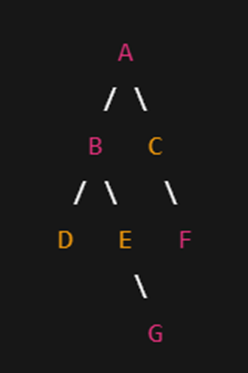

Dalam contoh diatas :

A -> Root

B dan C adalah children dari A

B punya 2 children lainnya, yaitu D dan E

E punya children G

C punya children F

Karena semua node punya 0–2 anak (tapi tak seimbang), ini bisa disebut tree (asalkan gak ada siklus kembali ke atas). Kalau kita tambahkan edge dari G ke B misalnya, maka sudah jadi graph biasa, bukan tree.

DFS memiliki dua metode, yaitu secara Recursive dan Non-Recursive :

**DFS Recursive**

In [ ]:
def dfs(graph, node, visited=None):
    if visited is None:
        visited = set()
    visited.add(node)
    print(node, end=' ')
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)
    return visited

graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['G'],
    'F': [],
    'G': []
}

print("DFS (rekursif) :")
dfs(graph, 'A')

DFS (rekursif) :
A B D E G C F 

{'A', 'B', 'C', 'D', 'E', 'F', 'G'}

Maksud dari Kode diatas :
1.	Gunakan fungsi yang memanggil dirinya sendiri.
2.	Setiap kali masuk ke node baru, posisi sebelumnya disimpan otomatis di “call stack”.
3.	Setelah selesai eksplorasi, otomatis balik ke node sebelumnya.

**Non-Recursive**

In [ ]:
def dfs_iterative(start):
    visited = set()
    stack = [start]

    while stack:
        node = stack.pop()
        if node not in visited:
            print(node, end=' ')
            visited.add(node)
            stack.extend(reversed(graph[node]))

graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['G'],
    'F': [],
    'G': []
}

print("DFS (non-rekursif) :")
dfs_iterative('A')

DFS (non-rekursif) :
A B D E G C F 

Maksud dari Kode diatas :
1.	Pakai stack buatan sendiri (manual).
2.	Mengatur urutan node yang mau dikunjungi.
3.	Tidak pakai fungsi yang memanggil dirinya sendiri.

Dari Contoh penerapan kode diatas, berikut merupakan Simulasi Traversal (Start dari A)
Urutan : A -> B -> D -> E -> G -> C -> F
Dari A ke B, ke D, kembali ke B, ke E, ke G, kembali lagi ke B, ke C dan terakhir ke F.


Perbandingan Recursive vs Non-Recursive :

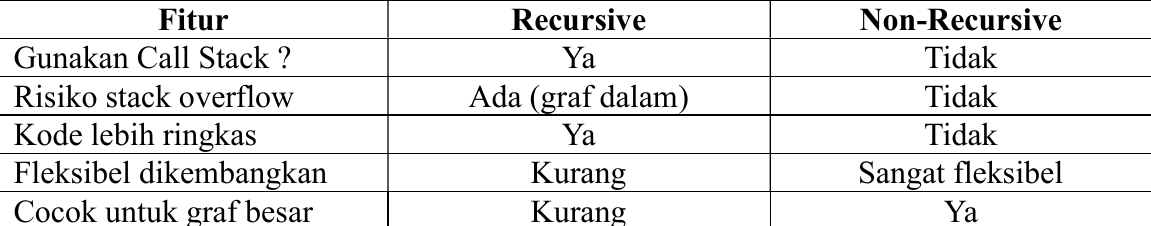

## Breadth First Search (BFS)

### Apa itu BFS?

BFS (Breadth First Search) adalah algoritma penelusuran yang bekerja dengan cara menjelajahi semua node pada level tertentu terlebih dahulu, baru lanjut ke level berikutnya. Cara kerja sederhananya :

1.	Mulai dari simpul awal (start node)
2.	Kunjungi semua tetangganya terlebih dahulu (yang berjarak 1)
3.	Lanjutkan ke tetangganya tetangga (yang berjarak 2, dst)
4.	Gunakan antrian (queue) untuk melacak urutan kunjungan

### Ciri-ciri BFS

1.	Menggunakan Queue (FIFO).
2.	Menelusuri secara melebar (level demi level).
3.	Menjamin menemukan jalur terpendek (jika semua bobot sama).
4.	Tidak bisa digunakan jika graf sangat besar dan tidak bisa ditampung semua di memori.
5.	Tetap butuh visited set/list agar tidak muter-muter (looping).

### Kapan BFS Cocok Digunakan?

1.	Mencari jalur terpendek (shortest path) di graf tanpa bobot.
2.	Masalah traversal level (misalnya menghitung jarak dari root ke semua node).
3.	Bot pencari rute tercepat (seperti GPS awal atau AI Game Basic).
4.	Peer-to-peer network discovery (semua tetangga dicari dulu).

###	Contoh Kasus

Sama seperti pada Gambar 1 dengan simulasi (Start dari A):
Urutan kunjungan: A → B → C → D → E → F → G

Penjelasan :
1.	Kunjungi A, masukin B dan C ke antrian
2.	Dari antrian ambil B, masukin D dan E
3.	Ambil C, masukin F
4.	Ambil D (nggak punya anak), lanjut ke E (masukin G), lalu ke F, terakhir ke G

Berikut merupakan contoh Implementasi dari BFS :

In [ ]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])

    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            print(vertex, end=' ')
            visited.add(vertex)
            for neighbor in graph[vertex]:
                if neighbor not in visited:
                    queue.append(neighbor)
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['G'],
    'F': [],
    'G': []
}

print("BFS :")
bfs(graph, 'A')

BFS :
A B C D E F G 

Berikut merupakan perbandingan DFS vs BFS :

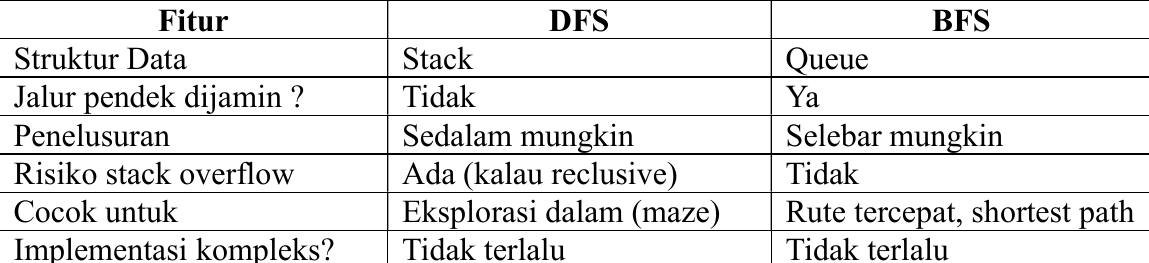

## Uninformed Search

### Apa itu Uninformed Search?

Uninformed Search adalah metode pencarian di mana algoritma tidak memiliki informasi lebih tentang jalur atau biaya menuju tujuan. Artinya, algoritma hanya mengandalkan informasi yang ada pada graf atau pohon yang sedang dianalisis. Pencarian ini tidak menggunakan heuristik atau informasi lainnya yang membantu mengarahkan pencarian. Beberapa contoh algoritma uninformed search adalah DFS (Depth-First Search) dan BFS (Breadth-First Search).

### Ciri-ciri Uninformed Search

1.	Tidak menggunakan heuristik atau informasi tentang jarak atau biaya.
2.	Algoritma hanya memeriksa node dalam graf secara sistematis.
3.	Algoritma ini sangat bergantung pada struktur graf atau pohon.
4.	DFS dan BFS adalah implementasi klasik dari uninformed search.

### Kapan Uninformed Search Cocok Digunakan?

1.	Tidak ada informasi tambahan atau heuristik untuk membantu pencarian, sehingga algoritma hanya mengandalkan struktur graf atau pohon yang ada.
2.	Mencari solusi di graf atau pohon yang tidak mempertimbangkan biaya atau jarak antar node, seperti pada pencarian jalur dalam graf tanpa bobot.
3.	DFS cocok digunakan untuk eksplorasi secara mendalam, misalnya saat kita perlu mengeksplorasi hingga ke kedalaman tertentu.
4.	BFS digunakan untuk mencari jalur terpendek di graf tanpa bobot, atau mencari jalur dengan urutan level demi level dari node awal ke node tujuan.

### Contoh Kasus

Berikut ini adalah contoh implementasi dari DFS dan BFS, yang keduanya merupakan algoritma dari Uninformed Search :

**DFS (Depth-First Search)**

DFS adalah algoritma pencarian yang menjelajah sepanjang satu cabang dari graf hingga tidak bisa melanjutkan, baru kembali (backtrack) ke node sebelumnya dan mencoba cabang lain. DFS bisa diimplementasikan secara rekursif atau non-rekursif.

Kode Implementasi DFS (Recursive) :

In [ ]:
def dfs(graph, node, visited):
    if node not in visited:
        print(node, end=" ")
        visited.add(node)
        for neighbor in graph[node]:
            dfs(graph, neighbor, visited)

graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['G'],
    'F': [],
    'G': []
}

visited = set()

print("DFS Traversal:")
dfs(graph, 'A', visited)

DFS Traversal:
A B D E G C F 

DFS (Depth-First Search) : Mulai dari A, DFS akan menelusuri cabang pertama (A → B → D), kemudian kembali ke B, melanjutkan ke E, kembali ke A, dan menelusuri C → F.

**BFS (Breadth-First Search)**

BFS adalah algoritma pencarian yang menjelajahi level demi level dari graf, mulai dari node awal dan terus bergerak ke tetangga-tetangga yang lebih jauh secara berurutan. BFS menjamin menemukan jalur terpendek jika semua bobot antar node sama.

Kode Implementasi BFS :

In [ ]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])

    while queue:
        node = queue.popleft()
        if node not in visited:
            print(node, end=" ")
            visited.add(node)
            for neighbor in graph[node]:
                queue.append(neighbor)
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['G'],
    'F': [],
    'G': []
}

print("\nBFS Traversal:")
bfs(graph, 'A')


BFS Traversal:
A B C D E F G 

BFS (Breadth-First Search) : Mulai dari A, BFS akan mengunjungi semua tetangga A terlebih dahulu (B dan C), lalu melanjutkan ke B → D, E, dan C → F.

## Informed Search

### Apa itu Informed Search?

Informed Search adalah metode pencarian yang menggunakan informasi tambahan, biasanya dalam bentuk heuristik, untuk membantu mencari jalur atau solusi yang lebih optimal. Heuristik ini memberikan panduan tentang seberapa jauh suatu node dari tujuan, yang memungkinkan algoritma untuk lebih fokus dalam pencarian menuju tujuan tersebut. Salah satu contoh algoritma yang termasuk dalam kategori ini adalah A (A Star) * dan Greedy Best-First Search.

### Ciri-ciri Informed Search

1.	Menggunakan heuristik yang memberikan estimasi biaya atau jarak menuju tujuan.
2.	Pencarian lebih terarah dan efisien karena algoritma memiliki informasi tambahan.
3.	Biasanya lebih cepat dibandingkan dengan Uninformed Search karena lebih fokus pada jalur yang lebih menjanjikan.
4.	A * dan Greedy Best-First Search adalah contoh dari algoritma Informed Search.

### Kapan Informed Search Cocok Digunakan?

1.	Ketika ada informasi tambahan yang bisa digunakan untuk mempercepat pencarian, seperti estimasi biaya menuju tujuan (heuristik).
2.	Jika masalah yang dihadapi memiliki banyak solusi yang mungkin, namun hanya satu yang optimal, sehingga heuristik dapat digunakan untuk memilih jalur yang paling menjanjikan.
3.	Misalnya dalam pencarian jalur terpendek, di mana setiap langkah memiliki biaya atau waktu yang berbeda.

### Contoh Kasus

Berikut adalah dua algoritma yang sering digunakan dalam Informed Search :

Greedy Best-First Search : Algoritma ini hanya mengandalkan heuristik untuk memilih jalur yang terlihat paling menjanjikan menuju tujuan. Algoritma ini tidak mempertimbangkan biaya yang telah dikeluarkan untuk mencapai suatu node, hanya jarak dari node tersebut ke tujuan.

**Greedy Best-First Search**

Kode Implementasi Greedy Best-First Search :

In [ ]:
import heapq

class Node:
    def __init__(self, name, h):
        self.name = name
        self.h = h
        self.f = h
        self.parent = None

    def __lt__(self, other):
        return self.f < other.f

def greedy_best_first(start, goal, neighbors, heuristic):
    open_list = []
    closed_list = set()
    start_node = Node(start, heuristic[start])
    heapq.heappush(open_list, start_node)

    while open_list:
        current_node = heapq.heappop(open_list)

        if current_node.name == goal:
            path = []
            while current_node:
                path.append(current_node.name)
                current_node = current_node.parent
            return path[::-1]

        closed_list.add(current_node.name)

        for neighbor, weight in neighbors[current_node.name]:
            if neighbor in closed_list:
                continue
            neighbor_node = Node(neighbor, heuristic[neighbor])
            neighbor_node.parent = current_node
            heapq.heappush(open_list, neighbor_node)

    return None

neighbors = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 2), ('D', 5)],
    'C': [('A', 4), ('B', 2), ('D', 1)],
    'D': [('B', 5), ('C', 1)]
}
heuristic = {'A': 7, 'B': 6, 'C': 2, 'D': 0}

start = 'A'
goal = 'D'
path = greedy_best_first(start, goal, neighbors, heuristic)
print("Path found:", path)

Path found: ['A', 'C', 'D']


A Search* : A * adalah salah satu algoritma pencarian yang paling terkenal dalam kategori ini. A * menggunakan dua parameter :
1. Biaya dari node asal menuju node yang sedang diproses, dan
2. Heuristik yang memperkirakan biaya dari node tersebut ke tujuan.

Kombinasi dari keduanya menghasilkan estimasi biaya total untuk setiap jalur, yang memungkinkan A* untuk memilih jalur terbaik.

**A Search* (Simplified)**

Kode Implementasi A Search* :

In [ ]:
import heapq

class Node:
    def __init__(self, name, g, h):
        self.name = name
        self.g = g
        self.h = h
        self.f = g + h
        self.parent = None

    def __lt__(self, other):
        return self.f < other.f

def a_star(start, goal, neighbors, heuristic):
    open_list = []
    closed_list = set()
    start_node = Node(start, 0, heuristic[start])
    heapq.heappush(open_list, start_node)

    while open_list:
        current_node = heapq.heappop(open_list)

        if current_node.name == goal:
            path = []
            while current_node:
                path.append(current_node.name)
                current_node = current_node.parent
            return path[::-1]

        closed_list.add(current_node.name)

        for neighbor, weight in neighbors[current_node.name]:
            if neighbor in closed_list:
                continue
            g = current_node.g + weight
            h = heuristic[neighbor]
            neighbor_node = Node(neighbor, g, h)
            neighbor_node.parent = current_node
            heapq.heappush(open_list, neighbor_node)

    return None

neighbors = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 2), ('D', 5)],
    'C': [('A', 4), ('B', 2), ('D', 1)],
    'D': [('B', 5), ('C', 1)]
}
heuristic = {'A': 7, 'B': 6, 'C': 2, 'D': 0}

start = 'A'
goal = 'D'
path = a_star(start, goal, neighbors, heuristic)
print("Path found:", path)

Path found: ['A', 'C', 'D']


## Greedy Best-First Search

### Apa itu Greedy Best-First Search?

Greedy Best-First Search adalah algoritma pencarian yang berusaha untuk menemukan jalur menuju tujuan secepat mungkin dengan memilih node berdasarkan perkiraan atau heuristik (estimasi jarak ke tujuan). Pada setiap langkahnya, algoritma ini memilih node yang memiliki nilai heuristik terbaik, yaitu yang paling dekat dengan tujuan menurut estimasi. Algoritma ini tidak mempertimbangkan biaya yang sudah dikeluarkan, hanya berdasarkan perkiraan jarak dari node ke tujuan.

### Ciri-ciri Greedy Best-First Search

1.	Menggunakan heuristik untuk memilih node yang paling menjanjikan.
2.	Tidak mempertimbangkan biaya yang sudah dikeluarkan.
3.	Bisa sangat cepat, tetapi tidak selalu menjamin jalur terpendek.
4.	Menggunakan open list untuk menyimpan node yang akan dieksplorasi selanjutnya.

### Kapan Greedy Best-First Search Cocok Digunakan?

1.	Ketika kita ingin mencari solusi dengan cepat tanpa harus mencari jalur terpendek.
2.	Misalnya, pada aplikasi yang membutuhkan pencarian solusi yang "cukup baik" dalam waktu singkat (misalnya, permainan atau aplikasi navigasi yang memprioritaskan waktu).

### Contoh Kasus

Pada graf, Greedy Best-First Search akan memilih node berdasarkan heuristik yang paling mendekati tujuan, tetapi tidak memperhatikan jalur yang sudah diambil atau biaya yang telah dikeluarkan.

In [ ]:
import heapq

class Node:
    def __init__(self, name, h):
        self.name = name
        self.h = h
        self.f = h
        self.parent = None

    def __lt__(self, other):
        return self.f < other.f

def greedy_best_first(start, goal, neighbors, heuristic):
    open_list = []
    closed_list = set()
    start_node = Node(start, heuristic[start])
    heapq.heappush(open_list, start_node)

    while open_list:
        current_node = heapq.heappop(open_list)

        if current_node.name == goal:
            path = []
            while current_node:
                path.append(current_node.name)
                current_node = current_node.parent
            return path[::-1]

        closed_list.add(current_node.name)

        for neighbor, weight in neighbors[current_node.name]:
            if neighbor in closed_list:
                continue
            neighbor_node = Node(neighbor, heuristic[neighbor])
            neighbor_node.parent = current_node
            heapq.heappush(open_list, neighbor_node)

    return None

neighbors = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 2), ('D', 5)],
    'C': [('A', 4), ('B', 2), ('D', 1)],
    'D': [('B', 5), ('C', 1)]
}
heuristic = {'A': 7, 'B': 6, 'C': 2, 'D': 0}

start = 'A'
goal = 'D'
path = greedy_best_first(start, goal, neighbors, heuristic)
print("Path found:", path)

Path found: ['A', 'C', 'D']


## A * Search

### Apa itu A* Search?

A* Search adalah algoritma pencarian jalur yang menggunakan dua informasi :
1. Jarak yang sudah ditempuh dari titik awal ke titik sekarang (g(n)), dan
2. Perkiraan jarak ke tujuan dari titik sekarang (h(n) atau heuristik).

Keduanya digabungkan menjadi : f(n) = g(n) + h(n). Jadi, A* akan memilih jalur yang paling menjanjikan menuju tujuan, bukan hanya yang dekat atau cepat saja.

### Ciri-ciri A * Search

1.	Menggunakan heuristik (perkiraan) untuk membantu pencarian.
2.	Dapat menemukan jalur terpendek jika heuristiknya tepat.
3.	Lebih efisien dibanding BFS atau DFS dalam banyak kasus.

### Kapan A * Cocok Digunakan?

1.	Saat kita punya informasi perkiraan jarak ke tujuan.
2.	Digunakan di sistem navigasi, game, atau aplikasi peta.

### Contoh Kasus

In [ ]:
import heapq

class Node:
    def __init__(self, name, g, h):
        self.name = name
        self.g = g
        self.h = h
        self.f = g + h
        self.parent = None

    def __lt__(self, other):
        return self.f < other.f

def a_star(start, goal, neighbors, heuristic):
    open_list = []
    closed_list = set()
    start_node = Node(start, 0, heuristic[start])
    heapq.heappush(open_list, start_node)

    while open_list:
        current_node = heapq.heappop(open_list)

        if current_node.name == goal:
            path = []
            while current_node:
                path.append(current_node.name)
                current_node = current_node.parent
            return path[::-1]

        closed_list.add(current_node.name)

        for neighbor, weight in neighbors[current_node.name]:
            if neighbor in closed_list:
                continue
            g = current_node.g + weight
            h = heuristic[neighbor]
            neighbor_node = Node(neighbor, g, h)
            neighbor_node.parent = current_node
            heapq.heappush(open_list, neighbor_node)

    return None

neighbors = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 2), ('D', 5)],
    'C': [('A', 4), ('B', 2), ('D', 1)],
    'D': [('B', 5), ('C', 1)]
}
heuristic = {'A': 7, 'B': 6, 'C': 2, 'D': 0}

start = 'A'
goal = 'D'
path = a_star(start, goal, neighbors, heuristic)
print("Path found:", path)

Path found: ['A', 'C', 'D']
